In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
tumor_SOM_clust = pd.read_csv("~/PRIMUS/data/83_BIOINFORMATICS/Ashkan/MALDI_ML/SOM_runs/_ITERATIVE_GRID_SEARCH/SOM_feature_selection/maldi_cluster_assignment_ward_kmeans.csv", 
                              index_col=0)
tumordf = tumor_SOM_clust.copy()

In [2]:
fib_SOM_clust = pd.read_csv("/home/azareie/PRIMUS/data/83_BIOINFORMATICS/Ashkan/MALDI_ML/SOM_runs/SOM_FIB_35000_iter_23_25_kl2/hclust_wardD2_results/FIB_kmeans_WARD_D2_clusters.csv", 
                              index_col=0)
fibdf = fib_SOM_clust.copy()

In [15]:
X = tumordf.drop(['label','cluster','kmeansCluster','clusterwD2'], axis=1)
yward = tumordf.cluster.values.reshape(-1, 1).ravel()
ywardD2 = tumordf.clusterwD2.values.reshape(-1, 1).ravel()
ywardKmeans = tumordf.kmeansCluster.values.reshape(-1, 1).ravel()

#le = preprocessing.LabelEncoder()
#newx = le.fit_transform(dfproc.group.values)
#LE = LabelEncoder()
#yenc = LE.fit_transform(y)

In [3]:
X = fibdf.drop(['label','cluster','kmeansCluster'], axis=1)
ywardD2 = fibdf.cluster.values.reshape(-1, 1).ravel()
ywardKmeans = fibdf.kmeansCluster.values.reshape(-1, 1).ravel()

In [4]:
def run_randomforest(Xdata, ydata, testSize=0.35, treeSize=50000):
    x_train, x_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=testSize)
    scaler = StandardScaler().fit(x_train) # Define the scaler
    x_train = scaler.transform(x_train) # Scale the train set
    x_test = scaler.transform(x_test) # Scale the test set
    rfmodel = RandomForestClassifier(n_estimators=treeSize, n_jobs=-1)
    rfmodel.fit(x_train,y_train)
    y_pred = rfmodel.predict(x_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    
    print("Features sorted by their score:")
    print(pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rfmodel.feature_importances_), X.columns), reverse=True)[:20], columns = ['Importance','m/z']))
    
    feature_imp = pd.Series(rfmodel.feature_importances_,index=list(X.columns)).sort_values(ascending=False)
    most_imp_features = feature_imp[feature_imp > 0.01]

    #print(most_imp_features)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(most_imp_features.index,most_imp_features)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()
    print(feature_imp.describe())

Accuracy: 0.9872835846543798
Features sorted by their score:
    Importance                  m/z
0       0.0497       X528.315429688
1       0.0299        X529.30657959
2       0.0283  X476.24310302699996
3       0.0271  X504.28411865199996
4       0.0270       X500.301422119
5       0.0223  X386.06491088900003
6       0.0220       X556.320373535
7       0.0168   X530.2977294919999
8       0.0147       X332.244537354
9       0.0140   X778.5671386719999
10      0.0129       X552.310668945
11      0.0121        X194.27406311
12      0.0120   X715.5649414060001
13      0.0118   X834.5500488280001
14      0.0115        X174.04524231
15      0.0112       X360.276550293
16      0.0112       X212.024963379
17      0.0108   X767.5651855469999
18      0.0102   X557.3205566409999
19      0.0102       X387.083099365


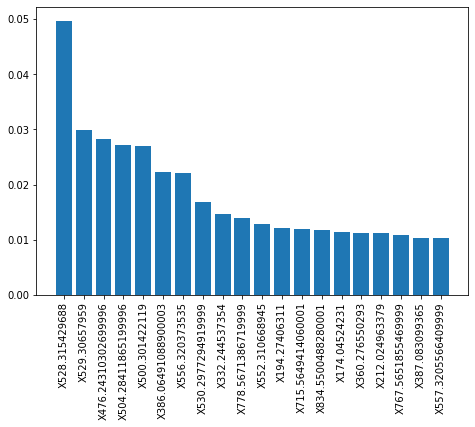

count    532.000000
mean       0.001880
std        0.004122
min        0.000129
25%        0.000255
50%        0.000591
75%        0.001555
max        0.049719
dtype: float64


In [5]:
run_randomforest(X,yward)

Accuracy: 0.9952023362536504
Features sorted by their score:
    Importance                  m/z
0       0.0453       X241.922164917
1       0.0440  X243.94955444299998
2       0.0374       X753.436523438
3       0.0371   X713.4113769530001
4       0.0322       X245.967926025
5       0.0317       X196.824066162
6       0.0309        X123.00012207
7       0.0299  X198.82441711400003
8       0.0276       X150.040969849
9       0.0269       X664.456726074
10      0.0232       X241.075164795
11      0.0206   X726.4227294919999
12      0.0205  X153.01446533200001
13      0.0203       X699.499023438
14      0.0203       X697.426574707
15      0.0182       X665.447937012
16      0.0170       X756.509155273
17      0.0170       X754.454711914
18      0.0154   X793.5067138669999
19      0.0154  X193.85957336400003


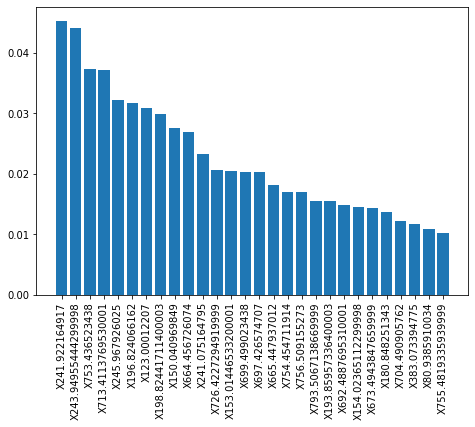

count    532.000000
mean       0.001880
std        0.005558
min        0.000068
25%        0.000142
50%        0.000253
75%        0.000776
max        0.045305
dtype: float64
CPU times: user 7min 36s, sys: 26.8 s, total: 8min 2s
Wall time: 35min 18s


In [5]:
%%time
run_randomforest(X,ywardD2)

Accuracy: 0.952857738840217
Features sorted by their score:
    Importance                  m/z
0       0.0283       X236.083297729
1       0.0279  X166.03480529799998
2       0.0267       X664.456726074
3       0.0245       X79.9834671021
4       0.0229  X122.00895690899999
5       0.0219       X150.040969849
6       0.0208       X178.045944214
7       0.0189        X208.06930542
8       0.0182  X152.02330017100002
9       0.0175   X662.4383544919999
10      0.0168  X190.03005981400003
11      0.0167   X713.4113769530001
12      0.0160       X616.430175781
13      0.0159   X634.4243774409999
14      0.0156        X123.00012207
15      0.0132       X618.403503418
16      0.0124       X665.447937012
17      0.0121       X262.123962402
18      0.0115   X755.4819335939999
19      0.0113        X590.39855957


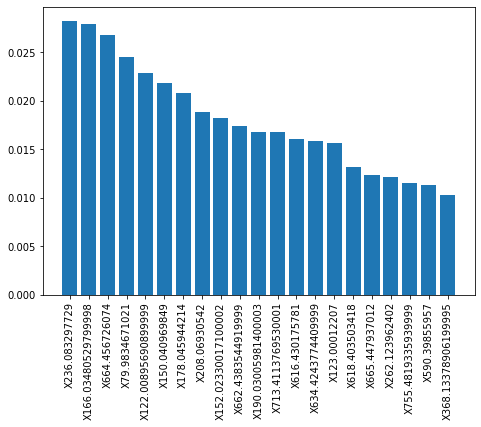

count    532.000000
mean       0.001880
std        0.003795
min        0.000298
25%        0.000459
50%        0.000670
75%        0.001206
max        0.028259
dtype: float64
CPU times: user 9min 54s, sys: 29.5 s, total: 10min 23s
Wall time: 45min 9s


In [6]:
%%time
run_randomforest(X,ywardKmeans)

In [ ]:
### run SOM again only on selected features from random forest, maybe top 50?

In [ ]:
### Guide for the presentation
#https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec 

#https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering

#https://stats.stackexchange.com/questions/195456/how-to-select-a-clustering-method-how-to-validate-a-cluster-solution-to-warran/195481#195481

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, ywardKmeans, test_size=0.45)
scaler = StandardScaler().fit(x_train) # Define the scaler
x_train = scaler.transform(x_train) # Scale the train set
x_test = scaler.transform(x_test) # Scale the test set

In [17]:
%%time

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='linear', cache_size=100000, verbose=True)
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[LibSVM][[17275   602]
 [  688 11363]]
              precision    recall  f1-score   support

           1       0.96      0.97      0.96     17877
           2       0.95      0.94      0.95     12051

    accuracy                           0.96     29928
   macro avg       0.96      0.95      0.96     29928
weighted avg       0.96      0.96      0.96     29928

CPU times: user 8.51 s, sys: 43.4 ms, total: 8.55 s
Wall time: 12min 51s


135    0.924111
171    0.791245
169    0.763571
56     0.745203
129    0.738762
34     0.721893
0      0.718868
132    0.698830
126    0.685017
204    0.662919
127    0.569107
130    0.530862
125    0.453996
44     0.425825
362    0.411010
188    0.373560
162    0.370791
72     0.368361
313    0.365298
57     0.343994
dtype: float64

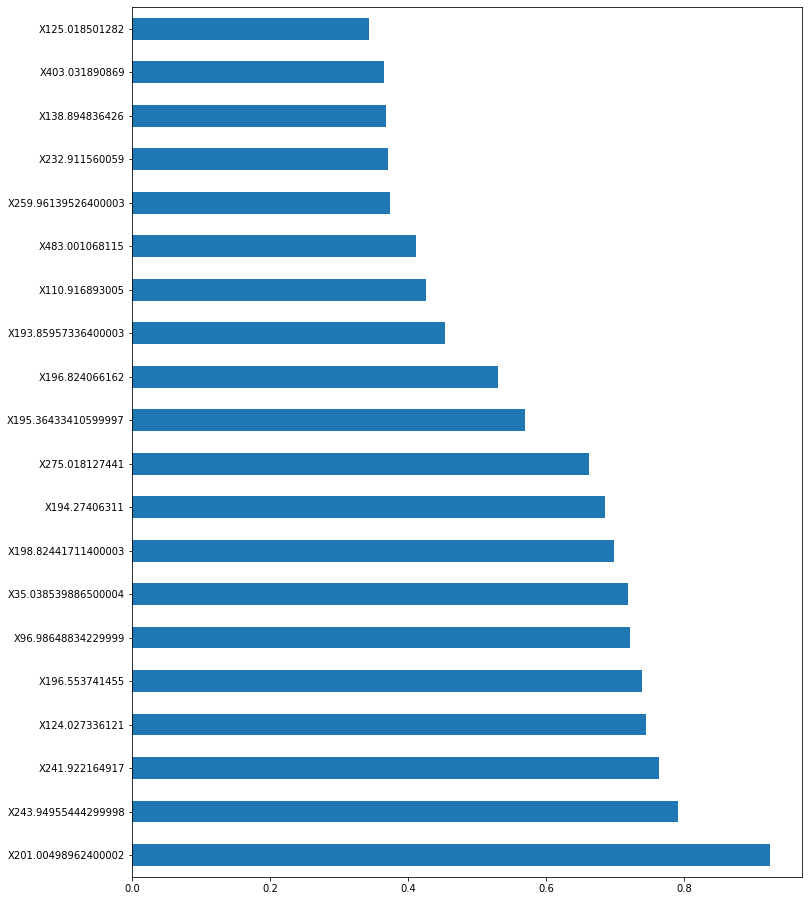

In [18]:
pd.Series(abs(svclassifier.coef_[0]), index=X.columns).nlargest(20).plot(kind='barh',figsize=(12, 16))

In [4]:
from sklearn.manifold import TSNE
import seaborn as sns

def run_tsne(X, y, Perplexity, Iterations, noprogresstolerance):
    tsneModel = TSNE(perplexity=Perplexity, n_iter=Iterations, n_iter_without_progress=noprogresstolerance, n_jobs=-1)
    X_embedded = tsneModel.fit_transform(X)
    return X_embedded

def plot_tsne(X_embedded, y):
    return sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y.ravel(), legend='full');

In [5]:
scaler = StandardScaler().fit(X) # Define the scaler
Xscaled = scaler.transform(X)

CPU times: user 19min 52s, sys: 1min 17s, total: 21min 10s
Wall time: 48min 43s


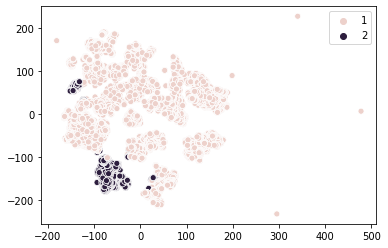

In [6]:
%%time

tsne1 = run_tsne(X=Xscaled, y=ywardD2, Perplexity=20, Iterations=20000, noprogresstolerance=5000)
plot_tsne(tsne1, ywardD2)

CPU times: user 19min 50s, sys: 1min 18s, total: 21min 8s
Wall time: 48min 23s


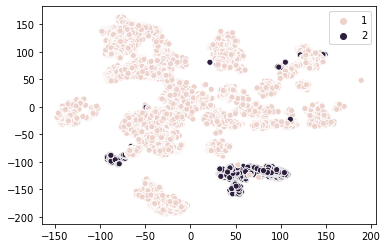

In [7]:
%%time

tsne2 = run_tsne(X=X, y=ywardD2, Perplexity=40, Iterations=20000, noprogresstolerance=2500)
plot_tsne(tsne2, ywardD2)

In [8]:
%%time

tsne3 = run_tsne(X=X, y=ywardD2, Perplexity=60, Iterations=10000, noprogresstolerance=2500)
plot_tsne(tsne3)

TypeError: plot_tsne() missing 1 required positional argument: 'y'

In [9]:
%%time

import dill

dill.dump_session("~/tsne3.envdb")

tsne4 = run_tsne(X=X, y=ywardD2, Perplexity=100, Iterations=10000, noprogresstolerance=2500)
plot_tsne(tsne4)

dill.dump_session("~/tsne4.envdb")

FileNotFoundError: [Errno 2] No such file or directory: '~/tsne3.envdb'

In [ ]:
%%time

tsne5 = run_tsne(X=X, y=ywardD2, Perplexity=20, Iterations=30000, noprogresstolerance=2500)
plot_tsne(tsne5)

In [ ]:
dill.dump_session("~/tsne_done.envdb")